In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('train.xlsx')

In [3]:
data.head()

,patron,P_smoker,Income ($K),Worked_in_service_industry,Large_Meal,%Tip
0,1,0.081745,101.257746,yes,yes,15.817449
1,2,0.101462,227.686797,yes,no,16.014624
2,3,0.018554,471.003974,no,no,10.185544
3,4,0.014987,457.095231,no,yes,10.149870
4,5,0.001330,785.029310,no,yes,10.013304


## Graph the data and describe any stories (exlain what you see, look for correlations etc.).(40)

#### P_smoker

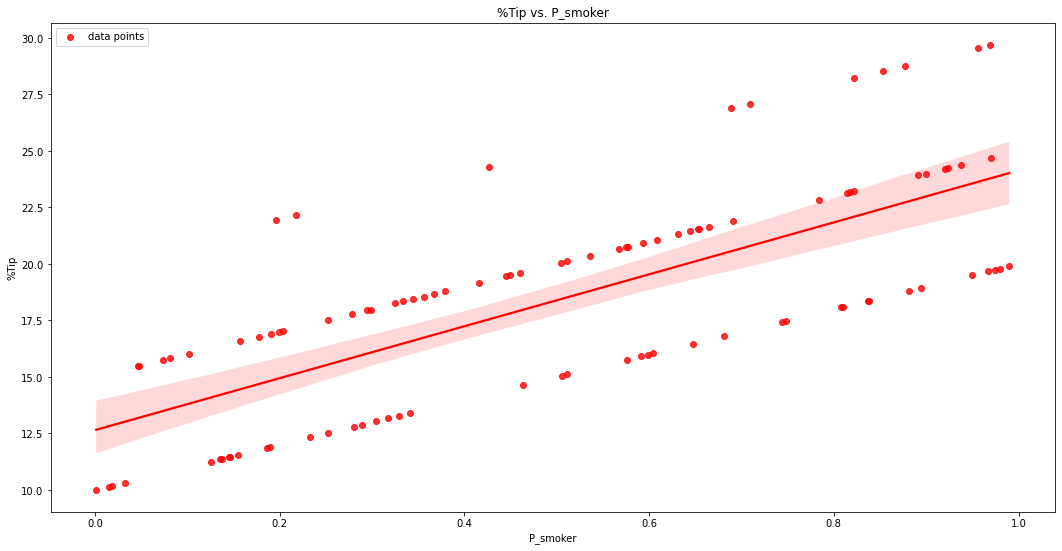

In [4]:
plt.figure(figsize=(18,9))
plt.title('%Tip vs. P_smoker')
sns.regplot(x='P_smoker',y='%Tip',data=data, color='red', label='data points')
plt.xlabel('P_smoker')
plt.ylabel('%Tip')
plt.legend()

In [5]:
data[['P_smoker','%Tip']].corr()

,P_smoker,%Tip
P_smoker,1.000000,0.728449
%Tip,0.728449,1.000000


From the data/graph as well as the correlation coef value 0.728, we can see that the %tips and P_smoker are slightly positively correlated.

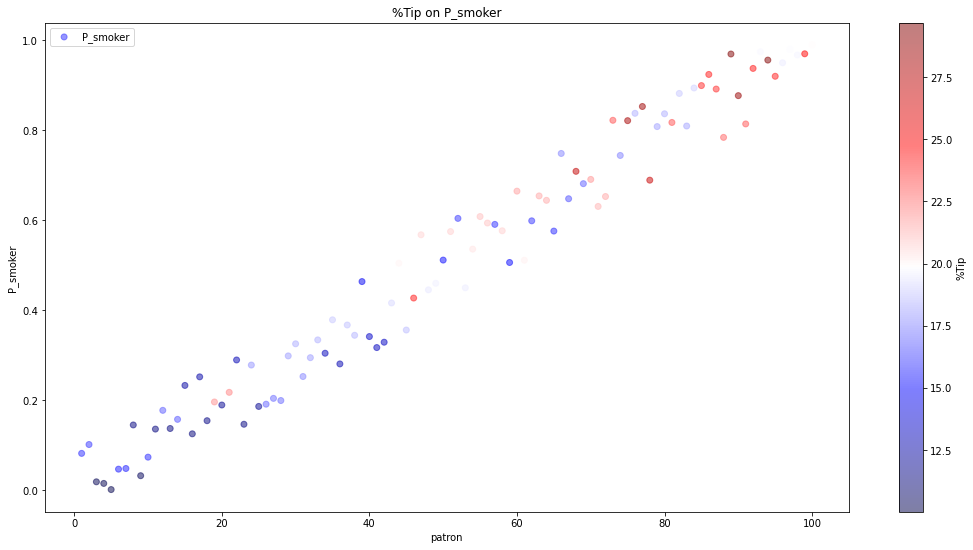

In [6]:
plt.figure(figsize=(18,9))
plt.title('%Tip on P_smoker')
plt.scatter(x='patron',y='P_smoker',data=data, alpha=0.5, label='P_smoker',c='%Tip', cmap = 'seismic')
plt.xlabel('patron')
plt.ylabel('P_smoker')
plt.colorbar(label='%Tip')
plt.legend()

In the above plot, we can see as the percentage of tip paid by smokers is higher compared to the percentage of tip paid by people who smoke less.

<AxesSubplot:xlabel='P_smoker', ylabel='Count'>

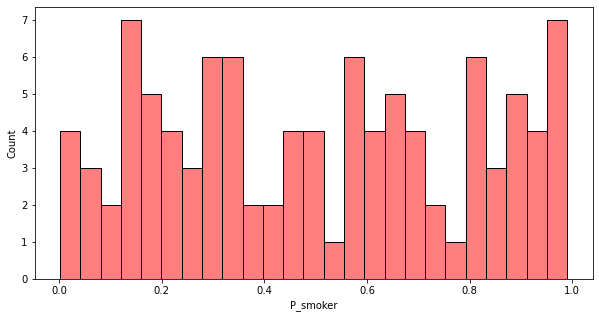

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data['P_smoker'], bins=25, color='red', alpha=0.5, label='P_smoker')

In the above plot, we can see that the data is almost uniformly distributed, although there are some highs and lows which will be investigated in mutlivariate analysis.

#### Income ($K)

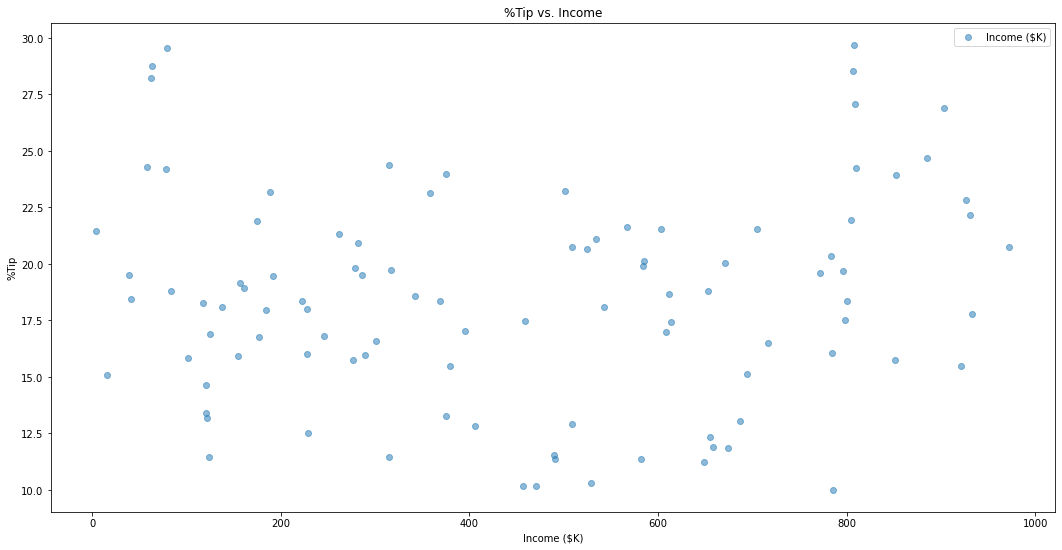

In [8]:
plt.figure(figsize=(18,9))
plt.title('%Tip vs. Income')
plt.scatter(x='Income ($K)',y='%Tip',data=data, alpha=0.5, label='Income ($K)', cmap = 'seismic')
plt.xlabel('Income ($K)')
plt.ylabel('%Tip')
plt.legend()

In [9]:
data[['Income ($K)','%Tip']].corr()

,Income ($K),%Tip
Income ($K),1.000000,0.053678
%Tip,0.053678,1.000000


From the data/graph as well as the correlation coef value 0.053, we can see that the %tips and Income are not at all correlated. Which is contradicory to our assumption that people with high income are more likely to tip more.

In [10]:
data_temp = data.sort_values(by='Income ($K)')

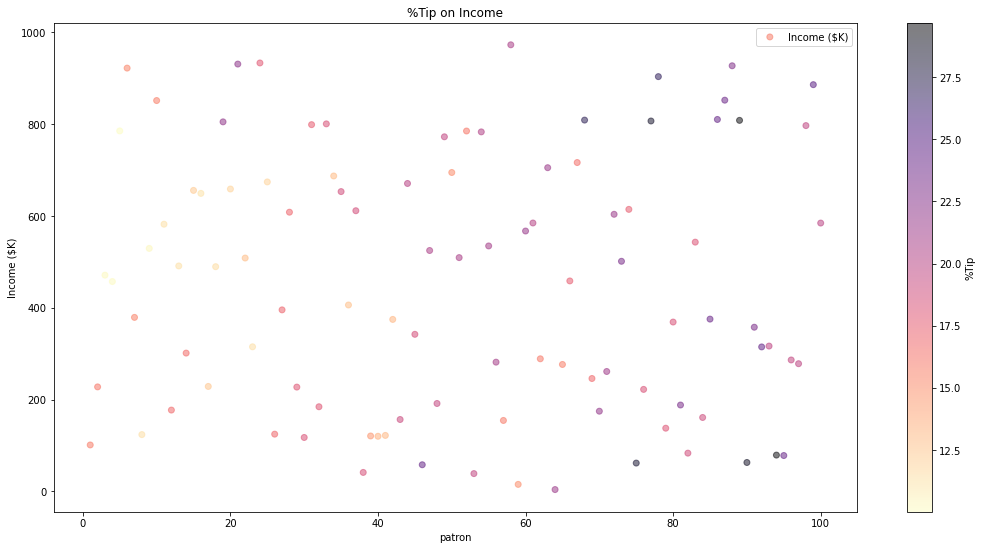

In [11]:
plt.figure(figsize=(18,9))
plt.title('%Tip on Income')
plt.scatter(x='patron',y='Income ($K)',data=data, alpha=0.5, label='Income ($K)',c='%Tip', cmap = 'magma_r')
plt.xlabel('patron')
plt.ylabel('Income ($K)')
plt.colorbar(label='%Tip')
plt.legend()

from the above plot, we can see the there is no specific relationship between the income and the tip paid. The data is almost uniformly distributed.

#### Worked_in_service_industry

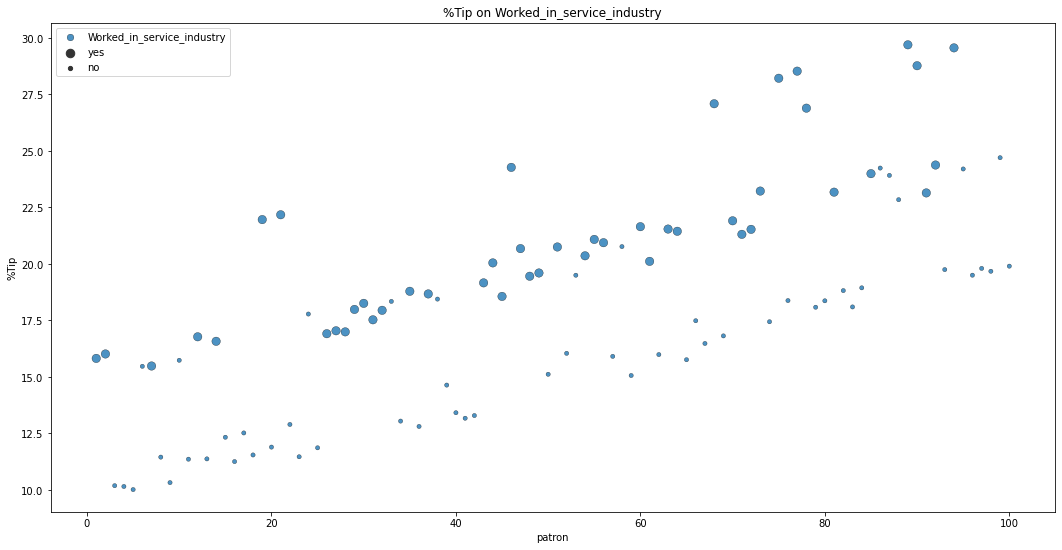

In [12]:
from turtle import color


plt.figure(figsize=(18,9))
plt.title('%Tip on Worked_in_service_industry')
sns.scatterplot(x='patron',y='%Tip',data=data,
                label='Worked_in_service_industry',size='Worked_in_service_industry',
                palette='seismic',alpha=0.8,edgecolor='black')
plt.legend()

In the above plot, though there isnt a specific releationship between %tip paid by people who worked in the service industry and the %tip paid by people who didnt work in the service industry, there tip is slightly higher for people who worked in the service industry.

#### Large meal

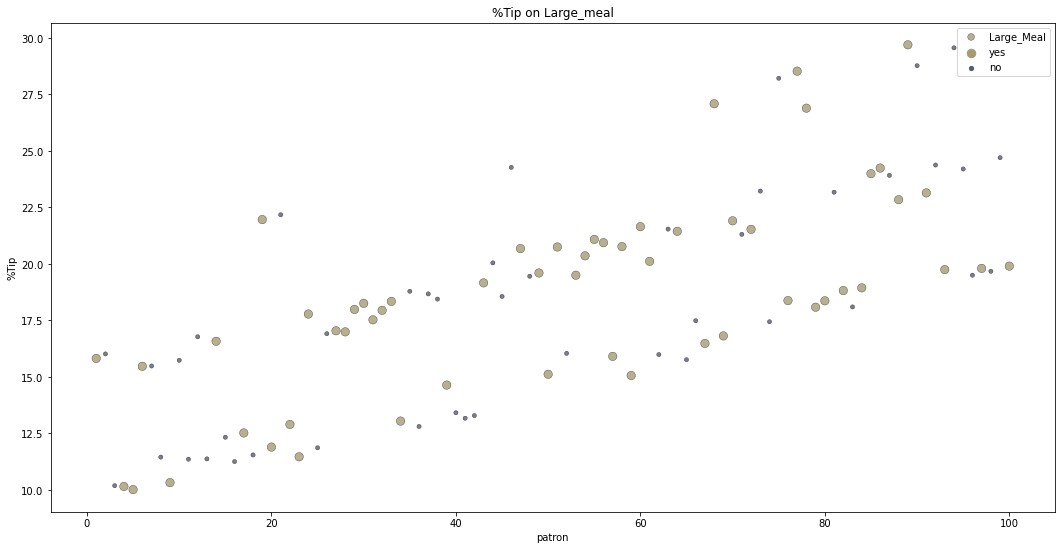

In [13]:
plt.figure(figsize=(18,9))
plt.title('%Tip on Large_meal')
sns.scatterplot(x='patron',y='%Tip',data=data, 
                label='Large_Meal',hue='Large_Meal', 
                size='Large_Meal',palette='cividis_r',
                alpha=0.8,edgecolor='black')
plt.legend()

In the above plot, there is no specific relationship between the %tip paid by people who had a large meal and the %tip paid by people who didnt have a large meal.

#### Income ($K) vs %Tip vs Large meal

<AxesSubplot:title={'center':'Income on Large_meal and %Tip'}, xlabel='Income ($K)', ylabel='%Tip'>

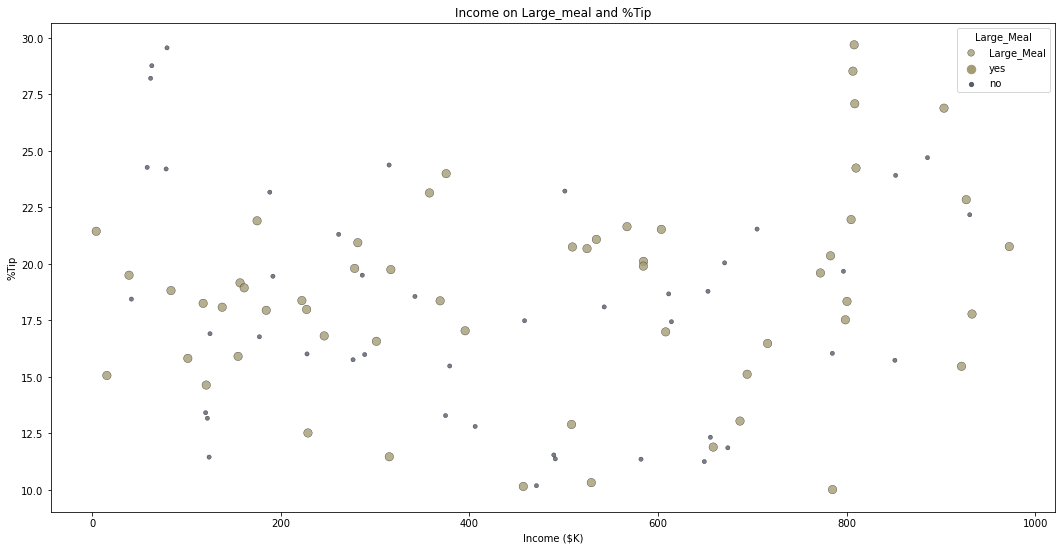

In [14]:
plt.figure(figsize=(18,9))
plt.title('Income on Large_meal and %Tip')
sns.scatterplot(x='Income ($K)',y='%Tip',data=data, 
                label='Large_Meal',hue='Large_Meal', 
                size='Large_Meal',palette='cividis_r',
                alpha=0.8,edgecolor='black')

From the above plot, we can see there is specific relationship between the income, lagre meal or not and the tip paid.

## Using Entropy, create splits in the data, making sure to explain why you chose the splitting order. (20)

In [112]:
print(len(data[data['%Tip']<18]))
print(len(data[data['%Tip']>=18]))

45
55
